# The median of independent repeated  sampling

In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


c:\Users\gelso\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random', 'median']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## The median of a distribution

The median of a distribution $P$ is the value $m$ such that if $X\sim P$, then $P(X\le m)\ge\frac12$ and  $P(X\ge m)\ge\frac12$. If multiple values satisfy this condition, the median is their average.

For example, for the biased die with distribution given by
<table>
<tr><th>x</th><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td><td>6</td></tr>
<tr><th>$P_X$(x)</th><td>0.1</td><td>0.2</td><td>0.1</td><td>0.3</td><td>0.1</td><td>0.2</td></tr>
</table>
Since $P(X\le 4)=0.7\ge 0.5$ and $P(X\ge 4)=0.6\ge 0.5$, $m=4$.

If the distribution was,
<table>
<tr><th>x</th><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td><td>6</td></tr>
<tr><th>$P_X$(x)</th><td>0.1</td><td>0.2</td><td>0.2</td><td>0.2</td><td>0.1</td><td>0.2</td></tr>
</table>
then both 3 and 4 satisfy the two conditions, and the median is 3.5. 

While writing the following functions, note that the distribution $P=[x_1,\ldots x_k]$ represents $P_X(1)=x_1,\ldots,P_X(k)=x_k$.

### Exercise 1

Write a function <code><font color="blue">median_cal</font>(P)</code> that returns the median given a distribution <code>P</code>.

<font color="blue">* **Sample run** *</font>
```python
print(median_cal([0.1 0.2 0.1 0.3 0.1 0.2]))
print(median_cal([0.99 0.01])
```
<font color="magenta">* **Expected Output** *</font>
```python
4
1
```

In [56]:
import statistics
def median_cal(P):
    ps = []
    count = 0
    for i, p in enumerate(P):
        count += p
        if (count - p) <= 0.5 and count >= 0.5:
            ps.append(i + 1)
    
    return sum(ps) / len(ps)

    #

In [69]:
P = [0.12, 0.04, 0.12, 0.12, 0.2, 0.16, 0.16, 0.08]
median_cal(P)

5.0

In [23]:
#Check Function

assert median_cal([0.99,0.01])==1
assert median_cal([0.1,0.2,0.1,0.3,0.1,0.2])==4


## Median of a sample 

If the distribution is given, as above, the median can be determined easily. In this problem we will learn how to approximate the median when the distribution is not given, but we are given samples that it generates. 

Similar to distributions, we can define the median of a set to be the set element $m'$ such that at least half the elements in the set are $\le m'$ and at least half the numbers in the collection are $\ge m'$. If two set elements satisfy this condition, then the median is their average. For example, the median of [3,2,5,5,2,4,1,5,4,4] is $4$ and the median of [2,1,5,3,3,5,4,2,4,5] is $3.5$.

To find the median of a $P$ distribution via access only to samples
it generates, we obtain $n$ samples from $P$, caluclate their median 
$M_n$, and then repeat the process many times and determine the average
of all the medians. 

### Exercise 2

Write a function <code><font color="blue">sample_median</font>(n,P)</code> that generates <code>n</code> random values using distribution <code>P</code> and returns the median of the collected sample.

Hint: Use function <b>random.choice()</b> to sample data from <code>P</code> and <b>median()</b> to find the median of the samples

<font color="blue">* **Sample run** *</font>
```python
print(sample_median(10,[0.1 0.2 0.1 0.3 0.1 0.2])) 
print(sample_median(10,[0.1 0.2 0.1 0.3 0.1 0.2]))
print(sample_median(5,P=[0.3,0.7])
print(sample_median(5,P=[0.3,0.7])
```
<font color="magenta">* **Expected Output** *</font>
```python
4.5
4.0
2.0
1.0
```



In [43]:
import random
import numpy as np
from statistics import median

def sample_median(n,P):
    #
    m = np.random.choice(len(P), size=n, p=P)
    return median(m)
    #

In [32]:
sample_median(10,[0.1,0.2,0.3,0.2,0.2])

2.5

In [46]:
#Check Function

assert abs(sample_median(10,[0.1,0.2,0.3,0.2,0.2])-3)<=1
assert abs(sample_median(25,[0.2,0.1,0.2,0.3,0.1,0.1])-3)<=1


(array([2.000e+00, 1.000e+00, 1.000e+01, 2.000e+00, 0.000e+00, 9.977e+03,
        3.000e+00, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8, 5.2, 5.6, 6. ]),
 <BarContainer object of 10 artists>)

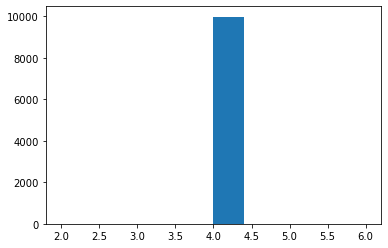

In [49]:
import matplotlib.pyplot as plt
to_hist = []
for n in np.arange(10000)+1:
    to_hist.append(sample_median(n, [0.12,0.04,0.12,0.12,0.2,0.16,0.16,0.08]))

plt.hist(to_hist)

In [52]:
print(np.min(to_hist),np.max(to_hist))

2.0 6.0


### Exercise 3 

Write a function <code><font color="blue">expected_cal</font>(P)</code> that finds the expected value of the distribution P.

In [35]:
def expected_cal(P):
    #
    return sum(np.array(P) * range(1, len(P) + 1))
    #
        

In [36]:
#Check function

assert expected_cal([0.25,0.25,0.25,0.25])==2.5
assert expected_cal([0.3,0.4,0.3])==2

In [53]:
expected_cal([0.12, 0.04, 0.12, 0.12, 0.2, 0.16, 0.16, 0.08])

4.76

### Exercise 4

In this exercise, we explore the relationship between the distribution median $m$, the sample median with $n$ samples, and $E[M_n]$,the expected value of $M_n$. 

Write a function <code><font color="blue">average_sample_median</font>(n,P)</code>, that return the average $M_n$ of 1000 samples of size <code>n</code> sampled from the distribution <code>P</code>.

<font color="blue">* **Sample run** *</font>
```python
print(average_sample_median(10,[0.2,0.1,0.15,0.15,0.2,0.2])) 
print(average_sample_median(10,[0.3,0.4,0.3]))
print(average_sample_median(10,P=[0.99,0.01])
```
<font color="magenta">* **Expected Output** *</font>
```python
3.7855
2.004
1
```

In [73]:

def sample_median(n,P):
    
    rms = random.choices(range(1, len(P) + 1), weights = P, k = n)
    return median(rms)
    
def average_sample_median(n,P):
    
    M = 1000
    sum_median = 0
    for i in range(M):
        sum_median += sample_median(n, P)
    return sum_median / M

In [71]:
#Check function
assert(abs(average_sample_median(20,[0.4,0.6])-median_cal([0.4,0.6]))<=5e-1)
assert(abs(average_sample_median(200,[0.1,0.2,0.3,0.1,0.1,0.2])-median_cal([0.1,0.2,0.3,0.1,0.1,0.2]))<=1e-2)

In [72]:
average_sample_median(10,[0.2,0.1,0.15,0.15,0.2,0.2])

3.7955